In [197]:
#Librerias

import pandas as pd
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt

#Parte A

In [198]:
#cargar el archivo json 
df_json = pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')
df_json

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [199]:
#1) Adicione una columna nueva 'smax' con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna 'solution'  
df_json['smax'] = df_json['solution'].apply(lambda l: max(map(abs,l)))
df_json

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [200]:
#2) Adicione dos columnas nuevas: 'sum_s' (sum_s³) con el resultado de la suma
#(al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna 'solution' 

df_json['sum_s'] = df_json['solution'].apply(lambda i : sum(i)) 
df_json['sum_s³'] = df_json['sum_s'].apply(lambda g: g**3)
df_json

,l,k,solution,gcd,n,smax,sum_s,sum_s³
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0



El numero aleatorio obtenido es : 141485

Los cofecicientes obtenidos de la fila 141485 son: [5, -6, -8, -9, -10, 16, 16, 19, -21, 23, -25]

El polinomio construido es: 
   10     9     8     7      6      5      4      3      2
5 x  - 6 x - 8 x - 9 x - 10 x + 16 x + 16 x + 19 x - 21 x + 23 x - 25

la derivada del polinomio es: 
    9      8      7      6      5      4      3      2
50 x - 54 x - 64 x - 63 x - 60 x + 80 x + 64 x + 57 x - 42 x + 23

las raices del polinomio son: 
[ 2.24551459+0.j         -1.40496588+0.j         -0.87227853+0.80270822j
 -0.87227853-0.80270822j -0.11618339+1.28230793j -0.11618339-1.28230793j
  1.        +0.j          0.96241101+0.j          0.18698206+0.81971123j
  0.18698206-0.81971123j]

Las raices reales del polinomio son: [ 2.24551459 -1.40496588  1.          0.96241101]




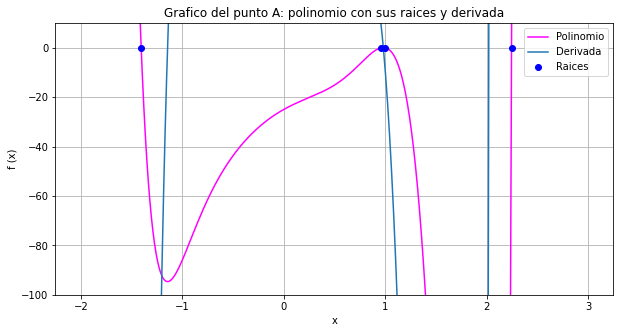

In [201]:
"""
3) Usando como semilla el número de su cédula, genere un número entero de forma 
aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número 
entero y construya un polinomio con esos coeficientes. Encuentre las raices 
reales de ese polinomio y realice el correspondiente gráfico incluyendo: el 
polinomio generado, sus raices (como puntos en gráfico) y la derivada del 
polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del 
gráfico, de manera que el polinomio y sus raices se visualicen de la mejor 
forma posible. (Sugerencia → use: plt.ylim(ymin,ymax) ). Se tendrá en cuenta la
 estética del gráfico presentado incluyendo la rotulación adecuada del mismo
"""
np.random.seed(1001445953)        #Generamos una semilla con el numero de cedula
x = np.random.randint(0,390073)   #Tomamos un numero random del intervalo
coefs = df_json.loc[x][2]         #Usamos el numero random como fila y tomamos los coeficientes de 'solution'
pol = np.poly1d(coefs)            #Generamos un polinomio con los coeficientes
raices = np.roots(pol)            #Hallamos las raices del polinomio
r_reales = raices[raices.imag == 0].real   #Hallamos las raices reales
a = np.linspace(-2,3,1000)
derivada = pol.deriv()

print("""
El numero aleatorio obtenido es : {}

Los cofecicientes obtenidos de la fila {} son: {}

El polinomio construido es: 
{}

la derivada del polinomio es: 
{}

las raices del polinomio son: 
{}

Las raices reales del polinomio son: {}

""".format(x,x,coefs,pol,derivada,raices,r_reales))

#Grafica
plt.figure(figsize=(10,5))
plt.title('Grafico del punto A: polinomio con sus raices y derivada')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.plot(a,pol(a),label = "Polinomio",color = "magenta")
plt.plot(a,derivada(a),label = "Derivada")
plt.plot(r_reales,pol(r_reales),'bo',label="Raices")
plt.legend()
plt.grid()
plt.ylim(-100,10)
plt.show()

#Parte B

El numero random obtenido es: 2
Como mi numero es 2, me toco la función sin(x)/x = +p
El valor obtenido para p es: 0.49893431338184513


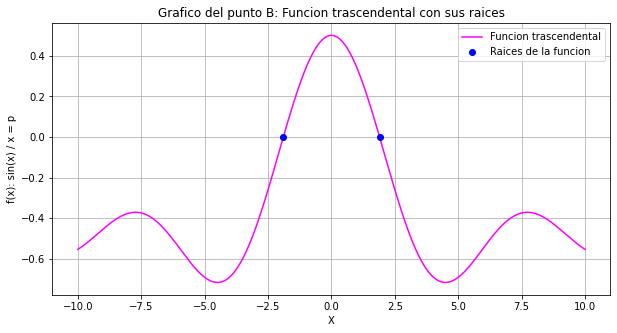

In [202]:
#1) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

np.random.seed(1001445953)        #Generamos una semilla
b = np.random.randint(1,6)        #Tomamos un numero random del intervalo
print("El numero random obtenido es: {}".format(b))

#2) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones


print("Como mi numero es 2, me toco la función sin(x)/x = +p")

#3) Genere un número aleatorio entre 0 y 1 y asignelo al valor de p

p = np.random.random()
print("El valor obtenido para p es: {}".format(p))

#4) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre 
#-10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones.

#Funcion 
def f (x):
  return np.sin(x)/x - p

Q = np.linspace(-10,10,1000)
I = [-2,2]
root_fp = optimize.fixed_point(lambda Q: Q - f(Q),I)

#Grafica 
plt.figure(figsize=(10,5))
plt.title("Grafico del punto B: Funcion trascendental con sus raices")
plt.plot(Q,f(Q),color = "magenta", label = "Funcion trascendental")
plt.plot(root_fp,f(root_fp),'bo',label = "Raices de la funcion")
plt.legend()
plt.xlabel("X")
plt.ylabel("f(x): sin(x) / x = p")
plt.grid()
plt.show()